# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


In [2]:
# Read Data
file_path = "data/Cleaned_Coding_Schema.xlsx"
data = pd.read_excel(file_path, na_values=[""], keep_default_na=False)

data = data[data['ID'].notna()]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

print(data)

        ID Bearbeiter 1 Bearbeiter 2                                              Title                                            Authors                                           DOI    Jahr                                              Track                                           Keywords                                  Research question Paper license model                                  Goal of the paper                            Motivation of the Paper                               Outcome of the Paper Type of paper                Type of inquiry 1                Type of inquiry 2                   BPM Lifecycle 1  BPM Lifecycle 2  BPM Lifecycle 3 New Artefact Introduced Theory         Type of Theory  Emphasis Formal concepts Algorithms         Hypothesis                              Independent Variables                                Dependent Variables Type of Artefact 1 Artefact success Reference             Research Method 1             Research Method 2  \
0      1.0  

In [3]:
columns_to_remove = [
    'Paper license model', 'BPM Lifecycle 1', 'BPM Lifecycle 2',
    'BPM Lifecycle 3', 'New Artefact Introduced', 'Theory',
    'Artefact success', 'Reference', 'Data format 1', 'Data format 2',
    'Data License', 'Artefact success.1', 'Reference.1',
    'Type of paper', 'Data License.1'
]
data = data.drop(columns=columns_to_remove, errors='ignore')

header_columns = list(data.columns)
print(header_columns)

['ID', 'Bearbeiter 1', 'Bearbeiter 2', 'Title', 'Authors', 'DOI', 'Jahr', 'Track', 'Keywords', 'Research question', 'Goal of the paper', 'Motivation of the Paper', 'Outcome of the Paper', 'Type of inquiry 1', 'Type of inquiry 2', 'Type of Theory', 'Emphasis', 'Formal concepts', 'Algorithms', 'Hypothesis', 'Independent Variables', 'Dependent Variables', 'Type of Artefact 1', 'Research Method 1', 'Research Method 2', 'Research Method 3', 'Research Method 4', 'Type of data', 'Total participants count', 'Students Count', 'Practitioners Count', 'Data accessibility', 'Data Metadata', 'Material accessibility', 'Evaluation Method 1', 'Evaluation Method 2', 'Evaluation Method 3', 'Evaluation Method 4', 'Threats to Validity 1', 'Threats to Validity 2', 'Threats to Validity 3', 'Threats to Validity 4', 'Existence', 'Availability', 'Type of Artefact 2', 'Research Method 1.1', 'Research Method 2.1', 'Research Method 3.1', 'Research Method 4.1', 'Type of data.1', 'Total participants count.1', 'Stude

In [4]:
def consolidate_columns(data, column_groups):
    """
    Consolidates column values into a list and replaces them with a new column at the original position.

    :param data: DataFrame to be modified.
    :param column_groups: List of dictionaries defining the groups of columns to consolidate.
                          Each dictionary should contain:
                          - 'columns': List of columns to consolidate.
                          - 'new_column': Name of the new consolidated column.
    :return: Modified DataFrame.
    """
    for group in column_groups:
        columns = group['columns']
        new_column = group['new_column']

        # Combine the values of the specified columns into a list
        data[new_column] = data[columns].apply(
            lambda row: list(dict.fromkeys([  # Use dict.fromkeys to remove duplicates
                "None" if value is None or str(value).strip().lower() == "none" else value  # Normalize None values
                for value in row if value != []  # Ignore empty lists
            ])),
            axis=1
        )

        # Insert the new column at the position of the first column in the group
        insert_position = data.columns.get_loc(columns[0])
        data.insert(insert_position, new_column, data.pop(new_column))

        # Drop the original columns
        data = data.drop(columns=columns)

    return data


# Define column groups for consolidation
column_groups = [
    {
        'columns': ['Research Method 1', 'Research Method 2', 'Research Method 3', 'Research Method 4'],
        'new_column': 'Research Method A1'
    },
    {
        'columns': ['Evaluation Method 1', 'Evaluation Method 2', 'Evaluation Method 3', 'Evaluation Method 4'],
        'new_column': 'Evaluation Method A1'
    },
    {
        'columns': ['Threats to Validity 1', 'Threats to Validity 2', 'Threats to Validity 3', 'Threats to Validity 4'],
        'new_column': 'Threats to Validity A1'
    },
    {
        'columns': ['Research Method 1.1', 'Research Method 2.1', 'Research Method 3.1', 'Research Method 4.1'],
        'new_column': 'Research Method A2'
    },
    {
        'columns': ['Evaluation Method 1.1', 'Evaluation Method 2.1', 'Evaluation Method 3.1', 'Evaluation Method 4.1'],
        'new_column': 'Evaluation Method A2'
    },
    {
        'columns': ['Threats to Validity 1.1', 'Threats to Validity 2.1', 'Threats to Validity 3.1', 'Threats to Validity 4.1'],
        'new_column': 'Threats to Validity A2'
    }
]

# Apply the consolidation
data = consolidate_columns(data, column_groups)

print(data.head(1))

    ID Bearbeiter 1 Bearbeiter 2                                              Title                                     Authors                                          DOI    Jahr       Track                                           Keywords Research question                                  Goal of the paper                            Motivation of the Paper                               Outcome of the Paper                Type of inquiry 1 Type of inquiry 2 Type of Theory Emphasis Formal concepts Algorithms Hypothesis Independent Variables Dependent Variables Type of Artefact 1   Research Method A1     Type of data Total participants count  Students Count Practitioners Count  Data accessibility Data Metadata Material accessibility                     Evaluation Method A1 Threats to Validity A1 Existence Availability Type of Artefact 2                   Research Method A2   Type of data.1 Total participants count.1  Students Count.1 Practitioners Count.1 Data format  \
0  1.0       

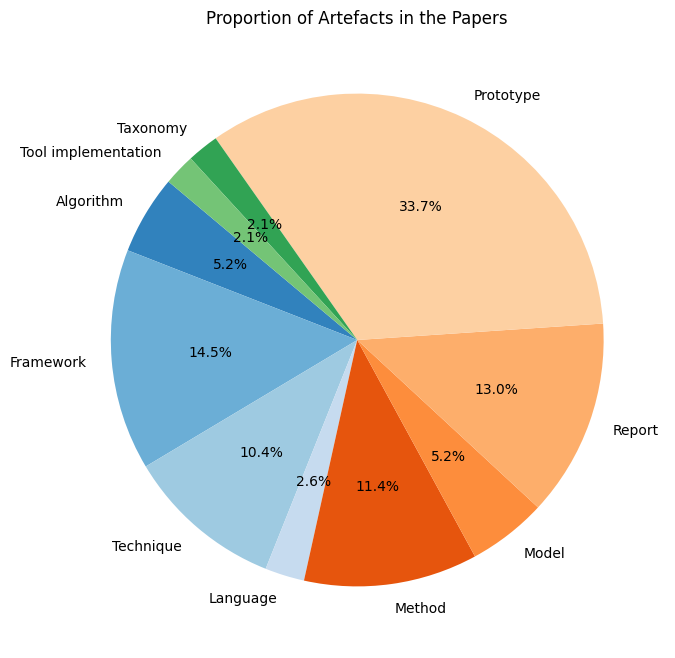

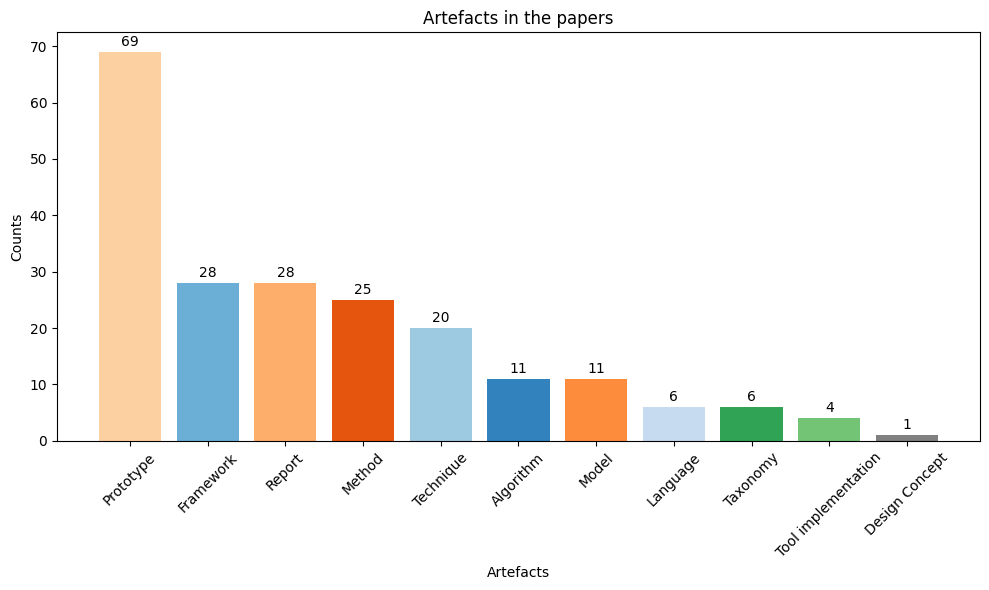

In [5]:
# Artefacts to analyze
artefacts = [
    "Algorithm", "Tool implementation", "Prototype", "Method",
    "Technique", "Language", "Design Concept", "Framework",
    "Taxonomy", "Model", "Report"
]

# Count occurrences of artefacts in 'Type of Artefact 1' and 'Type of Artefact 2'
artefact_counts = Counter()

for col in ['Type of Artefact 1', 'Type of Artefact 2']:
    for entry in data[col].dropna():
        if entry in artefacts:
            artefact_counts[entry] += 1

# Count artefact mentions in 'Comments'
comment_counts = Counter()

for comment in data['Comments'].dropna():
    for artefact in artefacts:
        if artefact.lower() in comment.lower():
            comment_counts[artefact] += 1

# Combine counts
combined_counts = {artefact: artefact_counts[artefact] + comment_counts[artefact] for artefact in artefacts}

# Prepare data for visualization
# For the pie chart
artefact_labels = list(artefact_counts.keys())
artefact_values = list(artefact_counts.values())
colors = plt.cm.tab20c.colors[:len(artefact_labels)]  # Generate consistent colors for the artefacts

# For the bar chart
sorted_combined = sorted(combined_counts.items(), key=lambda x: x[1], reverse=True)
bar_labels = [x[0] for x in sorted_combined]
bar_values = [x[1] for x in sorted_combined]
bar_colors = [colors[artefact_labels.index(label)] if label in artefact_labels else "gray" for label in bar_labels]

# Visualization
# Pie chart for Artefacts
plt.figure(figsize=(8, 8))
plt.pie(artefact_values, labels=artefact_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Artefacts in the Papers")
plt.show()

# Bar chart for Combined Artefact Mentions
plt.figure(figsize=(10, 6))
bars = plt.bar(bar_labels, bar_values, color=bar_colors)

# Add frequency labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(height)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Artefacts")
plt.ylabel("Counts")
plt.title("Artefacts in the papers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

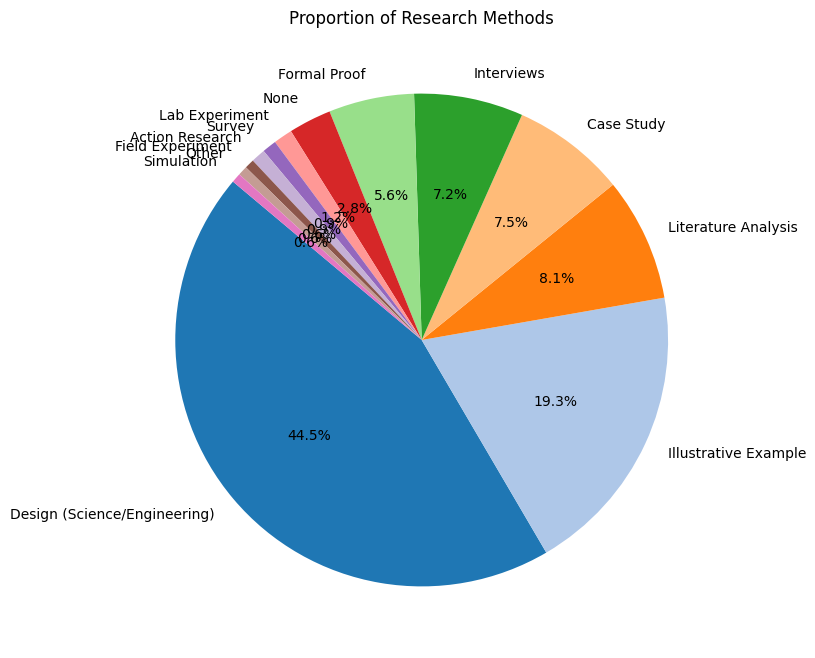

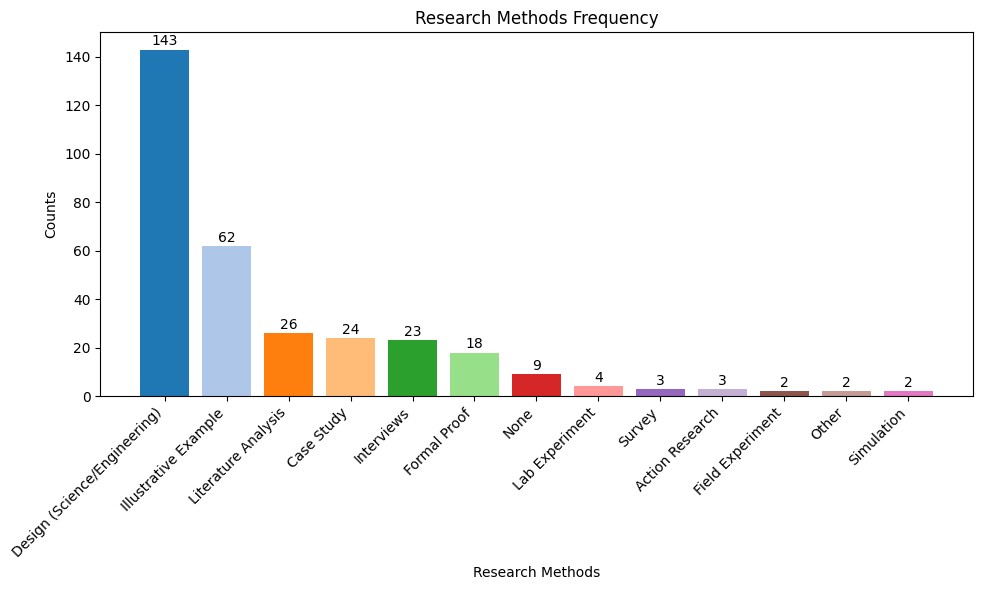

In [6]:
# Aktualisierte Liste der Research Methods
research_methods = [
    "Formal Proof", "Survey", "Lab Experiment", "Field Experiment",
    "Case Study", "Interviews", "Design (Science/Engineering)", "Simulation",
    "Action Research", "Illustrative Example", "Literature Analysis", "Other", "None"
]

# Initialize Counter for research methods
method_counts = Counter()

# Combine the counts from 'Research Method A1' and 'Research Method A2'
for col in ['Research Method A1', 'Research Method A2']:
    for entry in data[col].dropna():
        # Ensure the entry is treated as a list
        if isinstance(entry, str) and entry.startswith('[') and entry.endswith(']'):
            methods = eval(entry)  # Convert string representation of list to actual list
        elif isinstance(entry, list):
            methods = entry
        else:
            methods = [entry]  # Treat single values as a list

        # Count each method if it's in the defined research_methods
        for method in methods:
            if method in research_methods:
                method_counts[method] += 1

# Ensure all research_methods are in the counter (including "None")
for method in research_methods:
    method_counts[method] += 0  # Ensures methods with 0 counts appear in the output

# Sort methods by count in descending order
sorted_methods = sorted(method_counts.items(), key=lambda x: x[1], reverse=True)
method_labels = [x[0] for x in sorted_methods]
method_values = [x[1] for x in sorted_methods]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(method_labels)]

# Visualization
# Pie chart for Research Methods
plt.figure(figsize=(8, 8))
plt.pie(method_values, labels=method_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Research Methods")
plt.show()

# Bar chart for Research Methods
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(method_labels)), method_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, method_labels, method_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(method_labels)), method_labels, rotation=45, ha="right")

plt.xlabel("Research Methods")
plt.ylabel("Counts")
plt.title("Research Methods Frequency")
plt.tight_layout()
plt.show()

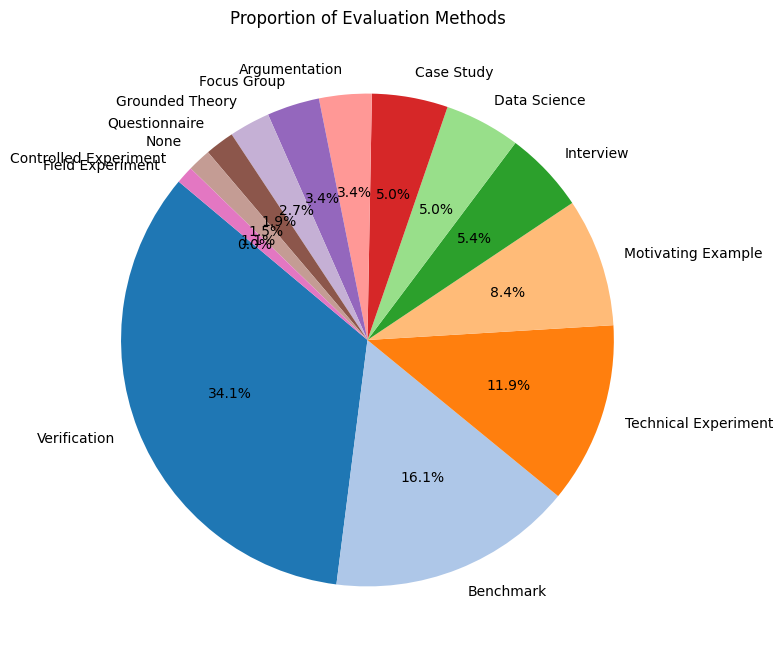

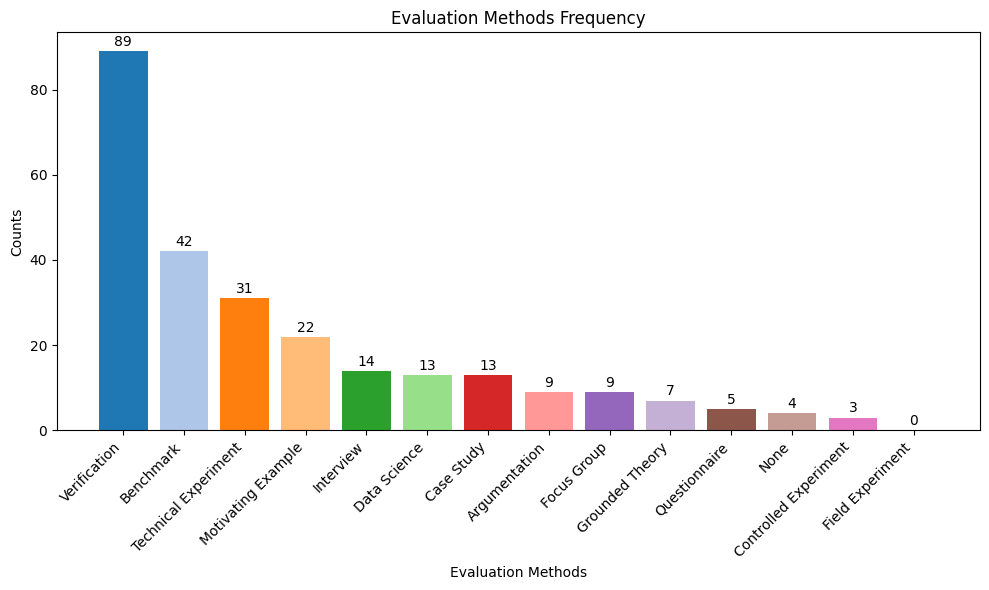

In [7]:
# Updated list of Evaluation Methods
evaluation_methods = [
    "Verification", "Field Experiment", "Benchmark", "Grounded Theory",
    "Argumentation", "Controlled Experiment", "Data Science", "Focus Group",
    "Questionnaire", "Interview", "Motivating Example",
    "Technical Experiment", "Case Study", "None"
]

# Initialize Counter for evaluation methods
method_counts = Counter()

# Combine the counts from 'Evaluation Method A1' and 'Evaluation Method A2'
for col in ['Evaluation Method A1', 'Evaluation Method A2']:
    for entry in data[col].dropna():
        # Ensure the entry is treated as a list
        if isinstance(entry, str) and entry.startswith('[') and entry.endswith(']'):
            methods = eval(entry)  # Convert string representation of list to actual list
        elif isinstance(entry, list):
            methods = entry
        else:
            methods = [entry]  # Treat single values as a list

        # Count each method if it's in the defined evaluation_methods
        for method in methods:
            if method in evaluation_methods:
                method_counts[method] += 1

# Ensure all evaluation_methods are in the counter (including "None")
for method in evaluation_methods:
    method_counts[method] += 0  # Ensures methods with 0 counts appear in the output

# Sort methods by count in descending order
sorted_methods = sorted(method_counts.items(), key=lambda x: x[1], reverse=True)
method_labels = [x[0] for x in sorted_methods]
method_values = [x[1] for x in sorted_methods]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(method_labels)]

# Visualization
# Pie chart for Evaluation Methods
plt.figure(figsize=(8, 8))
plt.pie(method_values, labels=method_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Evaluation Methods")
plt.show()

# Bar chart for Evaluation Methods
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(method_labels)), method_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, method_labels, method_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(method_labels)), method_labels, rotation=45, ha="right")

plt.xlabel("Evaluation Methods")
plt.ylabel("Counts")
plt.title("Evaluation Methods Frequency")
plt.tight_layout()
plt.show()

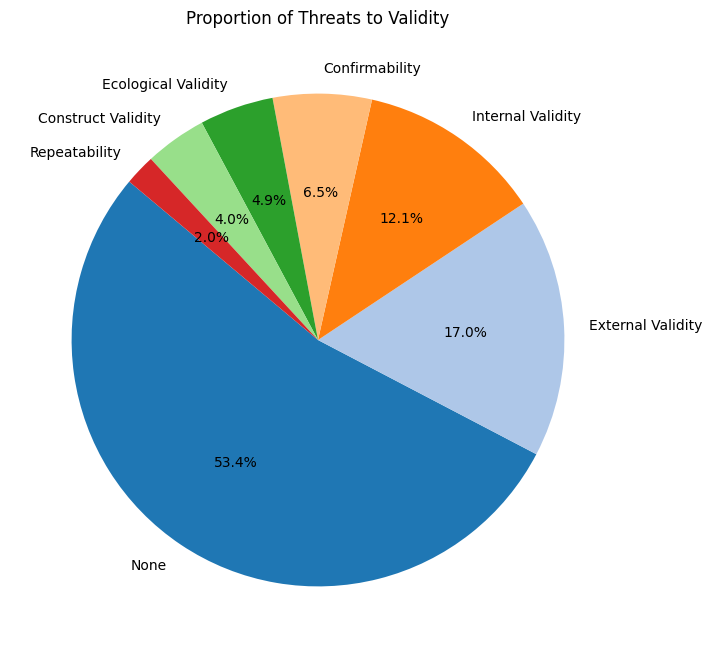

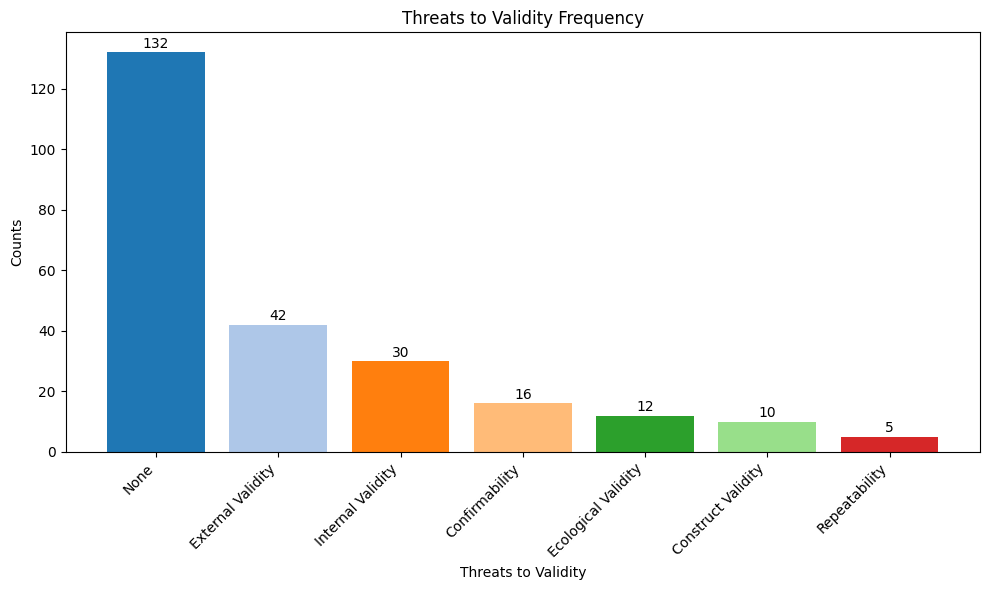

In [8]:
# Updated list of Threats to Validity
validity_threats = [
    "None", "External Validity", "Internal Validity",
    "Construct Validity", "Confirmability", "Repeatability", "Ecological Validity"
]

# Initialize Counter for threats to validity
threat_counts = Counter()

# Combine the counts from 'Threats to Validity A1' and 'Threats to Validity A2'
for col in ['Threats to Validity A1', 'Threats to Validity A2']:
    for entry in data[col].dropna():
        # Ensure the entry is treated as a list
        if isinstance(entry, str) and entry.startswith('[') and entry.endswith(']'):
            threats = eval(entry)  # Convert string representation of list to actual list
        elif isinstance(entry, list):
            threats = entry
        else:
            threats = [entry]  # Treat single values as a list

        # Count each threat if it's in the defined validity_threats
        for threat in threats:
            if threat in validity_threats:
                threat_counts[threat] += 1

# Ensure all validity_threats are in the counter (including "None")
for threat in validity_threats:
    threat_counts[threat] += 0  # Ensures threats with 0 counts appear in the output

# Sort threats by count in descending order
sorted_threats = sorted(threat_counts.items(), key=lambda x: x[1], reverse=True)
threat_labels = [x[0] for x in sorted_threats]
threat_values = [x[1] for x in sorted_threats]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(threat_labels)]

# Visualization
# Pie chart for Threats to Validity
plt.figure(figsize=(8, 8))
plt.pie(threat_values, labels=threat_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Threats to Validity")
plt.show()

# Bar chart for Threats to Validity
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(threat_labels)), threat_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, threat_labels, threat_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(threat_labels)), threat_labels, rotation=45, ha="right")

plt.xlabel("Threats to Validity")
plt.ylabel("Counts")
plt.title("Threats to Validity Frequency")
plt.tight_layout()
plt.show()

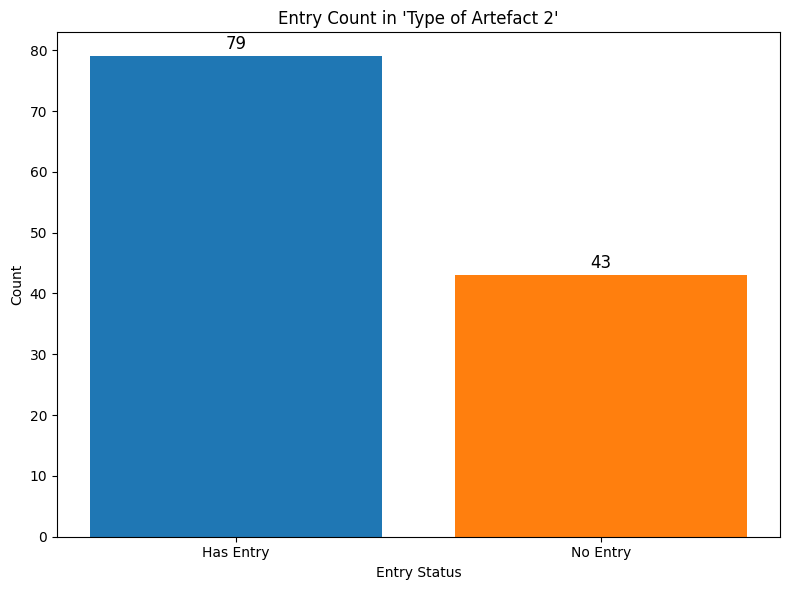

In [9]:
# Count entries in 'Type of Artefact 2'
has_entry_count = data['Type of Artefact 2'].notna().sum()  # Count non-NaN entries
no_entry_count = data['Type of Artefact 2'].isna().sum()    # Count NaN entries

# Prepare data for visualization
labels = ['Has Entry', 'No Entry']
values = [has_entry_count, no_entry_count]
colors = ['#1f77b4', '#ff7f0e']  # Define consistent colors

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)

# Add frequency labels above the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Customize chart
plt.title("Entry Count in 'Type of Artefact 2'")
plt.xlabel("Entry Status")
plt.ylabel("Count")
plt.tight_layout()

# Show the chart
plt.show()

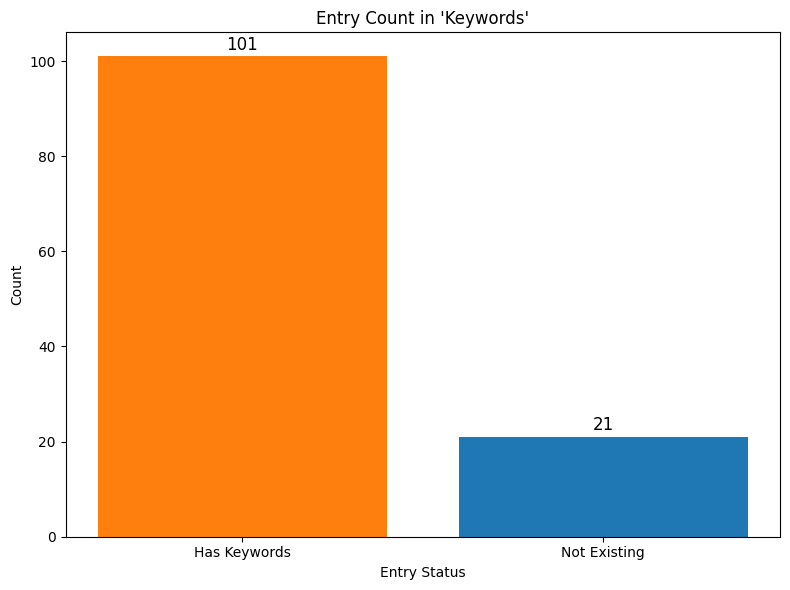

In [10]:
# Count 'not existing' and other entries in 'Keywords'
not_existing_count = (data['Keywords'] == 'not existing').sum()  # Count 'not existing'
has_keywords_count = (data['Keywords'] != 'not existing').sum()  # Count other entries

# Prepare data for visualization
labels = ['Has Keywords', 'Not Existing']
values = [has_keywords_count, not_existing_count]
colors = ['#ff7f0e', '#1f77b4']  # Define consistent colors

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)

# Add frequency labels above the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Customize chart
plt.title("Entry Count in 'Keywords'")
plt.xlabel("Entry Status")
plt.ylabel("Count")
plt.tight_layout()

# Show the chart
plt.show()

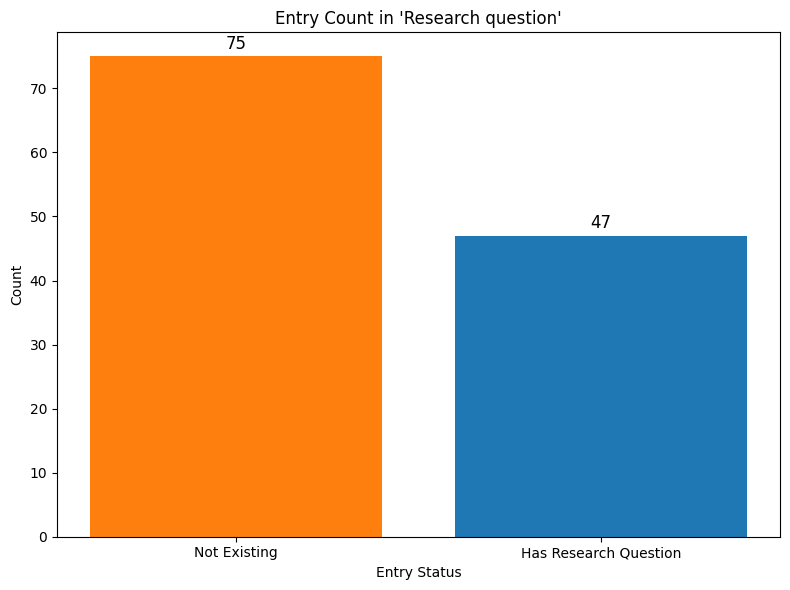

In [11]:
# Count 'not existing' and other entries in 'Research question'
not_existing_count = (data['Research question'] == 'not existing').sum()  # Count 'not existing'
has_question_count = (data['Research question'] != 'not existing').sum()  # Count other entries

# Prepare data for visualization
labels = ['Not Existing', 'Has Research Question']
values = [not_existing_count, has_question_count]
colors = ['#ff7f0e', '#1f77b4']  # Define consistent colors

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)

# Add frequency labels above the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Customize chart
plt.title("Entry Count in 'Research question'")
plt.xlabel("Entry Status")
plt.ylabel("Count")
plt.tight_layout()

# Show the chart
plt.show()

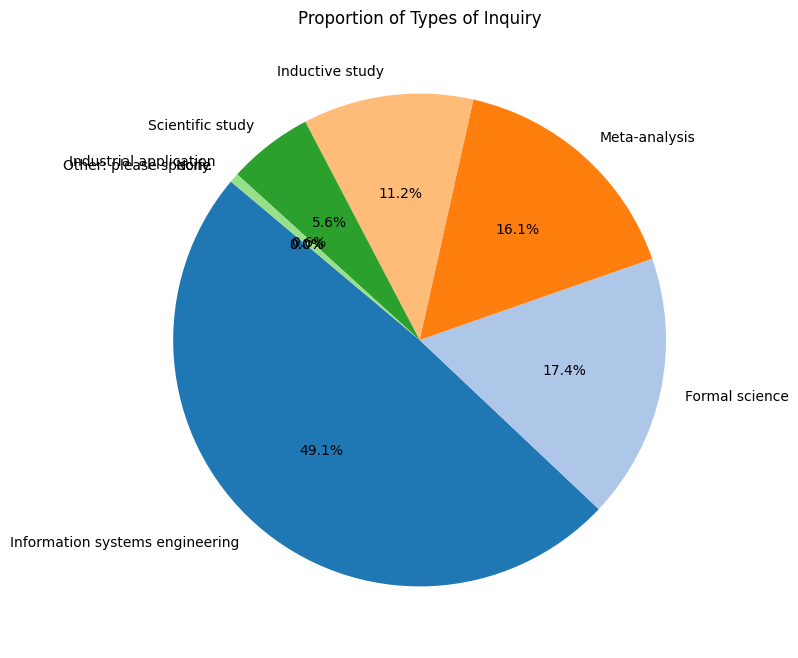

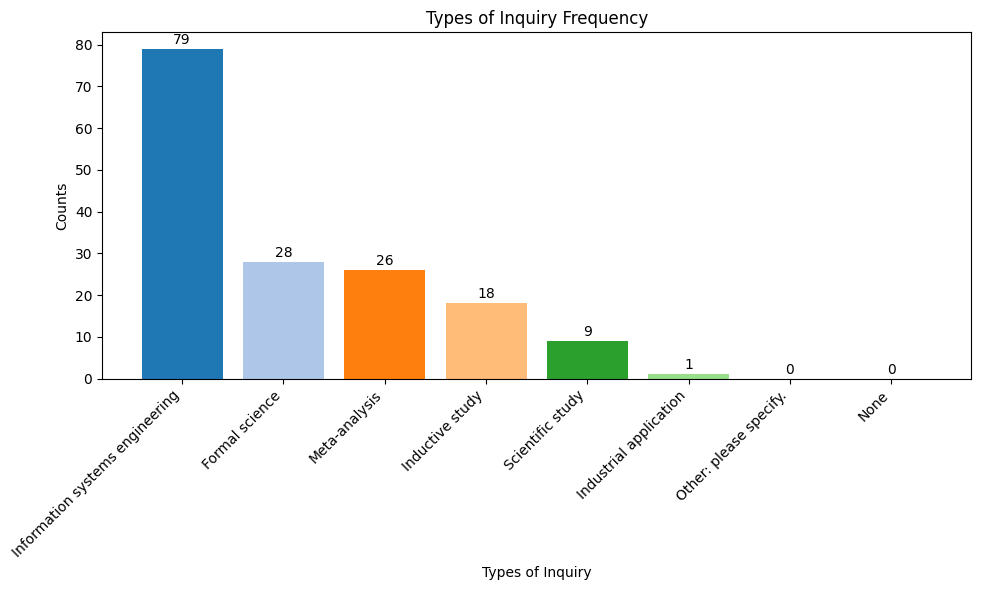

In [12]:
# Updated list of Types of Inquiry
types_of_inquiry = [
    "Formal science", "Information systems engineering", "Scientific study",
    "Inductive study", "Meta-analysis", "Industrial application",
    "Other: please specify.", "None"
]

# Initialize Counter for types of inquiry
inquiry_counts = Counter()

# Combine the counts from 'Type of Inquiry 1' and 'Type of Inquiry 2'
for col in ['Type of inquiry 1', 'Type of inquiry 2']:
    for entry in data[col].dropna():
        # Ensure the entry is treated as a list
        if isinstance(entry, str) and entry.startswith('[') and entry.endswith(']'):
            inquiries = eval(entry)  # Convert string representation of list to actual list
        elif isinstance(entry, list):
            inquiries = entry
        else:
            inquiries = [entry]  # Treat single values as a list

        # Count each inquiry type if it's in the defined types_of_inquiry
        for inquiry in inquiries:
            if inquiry in types_of_inquiry:
                inquiry_counts[inquiry] += 1

# Ensure all types_of_inquiry are in the counter (including "None")
for inquiry in types_of_inquiry:
    inquiry_counts[inquiry] += 0  # Ensures types with 0 counts appear in the output

# Sort inquiries by count in descending order
sorted_inquiries = sorted(inquiry_counts.items(), key=lambda x: x[1], reverse=True)
inquiry_labels = [x[0] for x in sorted_inquiries]
inquiry_values = [x[1] for x in sorted_inquiries]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(inquiry_labels)]

# Visualization
# Pie chart for Types of Inquiry
plt.figure(figsize=(8, 8))
plt.pie(inquiry_values, labels=inquiry_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Types of Inquiry")
plt.show()

# Bar chart for Types of Inquiry
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(inquiry_labels)), inquiry_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, inquiry_labels, inquiry_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(inquiry_labels)), inquiry_labels, rotation=45, ha="right")

plt.xlabel("Types of Inquiry")
plt.ylabel("Counts")
plt.title("Types of Inquiry Frequency")
plt.tight_layout()
plt.show()

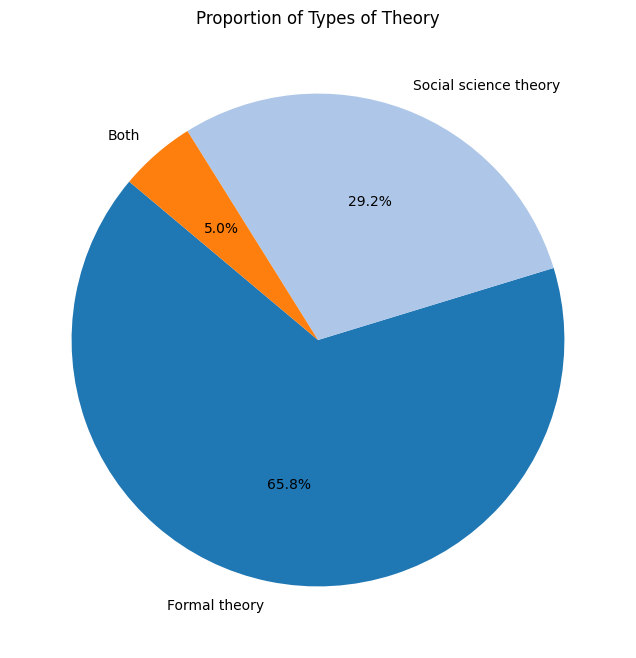

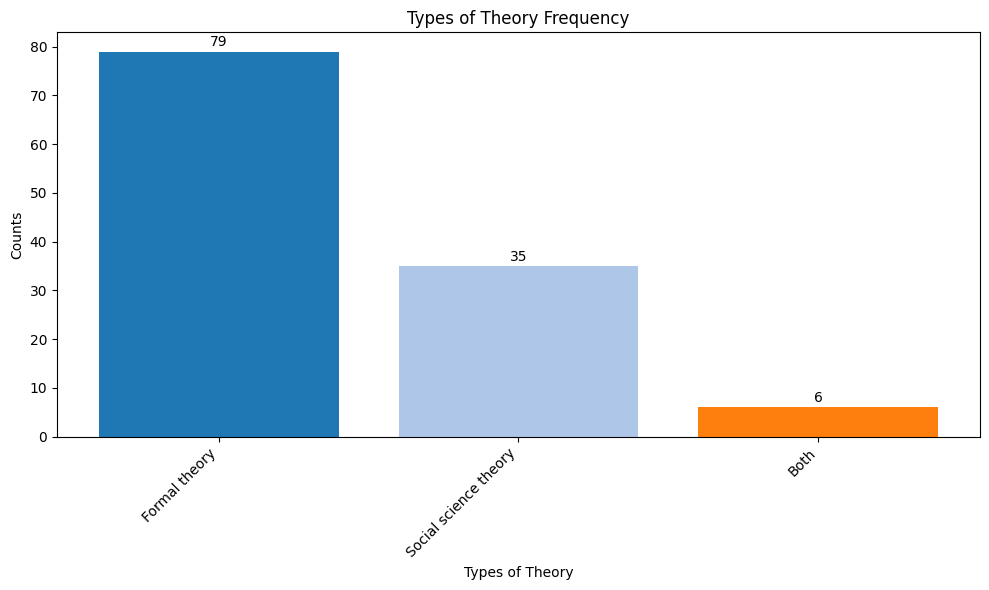

In [13]:
# Updated list of Types of Theory
types_of_theory = ["Formal theory", "Social science theory", "Both"]

# Initialize Counter for types of theory
theory_counts = Counter()

# Analyze 'Type of Theory'
for entry in data['Type of Theory'].dropna():
    # Ensure the entry is treated as a list (if stored as strings or lists)
    if isinstance(entry, str) and entry.startswith('[') and entry.endswith(']'):
        theories = eval(entry)  # Convert string representation of list to actual list
    elif isinstance(entry, list):
        theories = entry
    else:
        theories = [entry]  # Treat single values as a list

    # Count each theory type if it's in the defined types_of_theory
    for theory in theories:
        if theory in types_of_theory:
            theory_counts[theory] += 1

# Ensure all types_of_theory are in the counter (including zero occurrences)
for theory in types_of_theory:
    theory_counts[theory] += 0  # Ensures types with 0 counts appear in the output

# Sort theories by count in descending order
sorted_theories = sorted(theory_counts.items(), key=lambda x: x[1], reverse=True)
theory_labels = [x[0] for x in sorted_theories]
theory_values = [x[1] for x in sorted_theories]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(theory_labels)]

# Visualization
# Pie chart for Types of Theory
plt.figure(figsize=(8, 8))
plt.pie(theory_values, labels=theory_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Types of Theory")
plt.show()

# Bar chart for Types of Theory
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(theory_labels)), theory_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, theory_labels, theory_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(theory_labels)), theory_labels, rotation=45, ha="right")

plt.xlabel("Types of Theory")
plt.ylabel("Counts")
plt.title("Types of Theory Frequency")
plt.tight_layout()
plt.show()

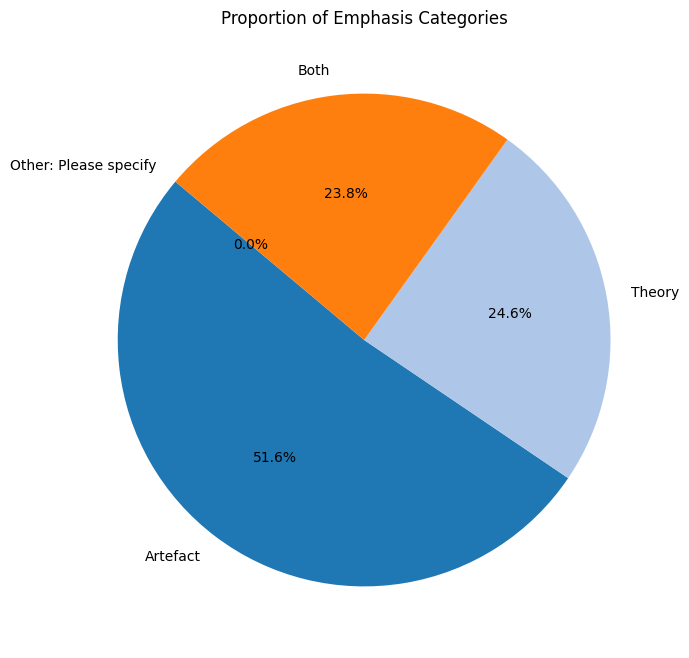

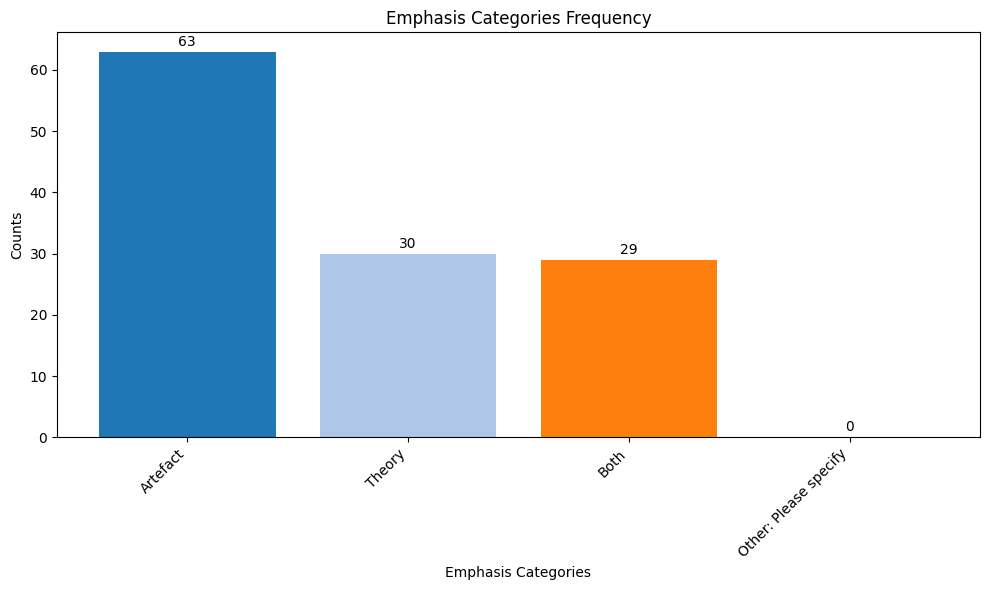

In [14]:
# Updated list of Emphasis categories
emphasis_categories = ["Theory", "Artefact", "Both", "Other: Please specify"]

# Initialize Counter for emphasis categories
emphasis_counts = Counter()

# Analyze 'Emphasis'
for entry in data['Emphasis'].dropna():
    # Ensure the entry is treated as a list (if stored as strings or lists)
    if isinstance(entry, str) and entry.startswith('[') and entry.endswith(']'):
        emphases = eval(entry)  # Convert string representation of list to actual list
    elif isinstance(entry, list):
        emphases = entry
    else:
        emphases = [entry]  # Treat single values as a list

    # Count each emphasis category if it's in the defined emphasis_categories
    for emphasis in emphases:
        if emphasis in emphasis_categories:
            emphasis_counts[emphasis] += 1

# Ensure all emphasis_categories are in the counter (including zero occurrences)
for emphasis in emphasis_categories:
    emphasis_counts[emphasis] += 0  # Ensures categories with 0 counts appear in the output

# Sort emphasis categories by count in descending order
sorted_emphases = sorted(emphasis_counts.items(), key=lambda x: x[1], reverse=True)
emphasis_labels = [x[0] for x in sorted_emphases]
emphasis_values = [x[1] for x in sorted_emphases]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(emphasis_labels)]

# Visualization
# Pie chart for Emphasis
plt.figure(figsize=(8, 8))
plt.pie(emphasis_values, labels=emphasis_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Emphasis Categories")
plt.show()

# Bar chart for Emphasis
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(emphasis_labels)), emphasis_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, emphasis_labels, emphasis_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(emphasis_labels)), emphasis_labels, rotation=45, ha="right")

plt.xlabel("Emphasis Categories")
plt.ylabel("Counts")
plt.title("Emphasis Categories Frequency")
plt.tight_layout()
plt.show()

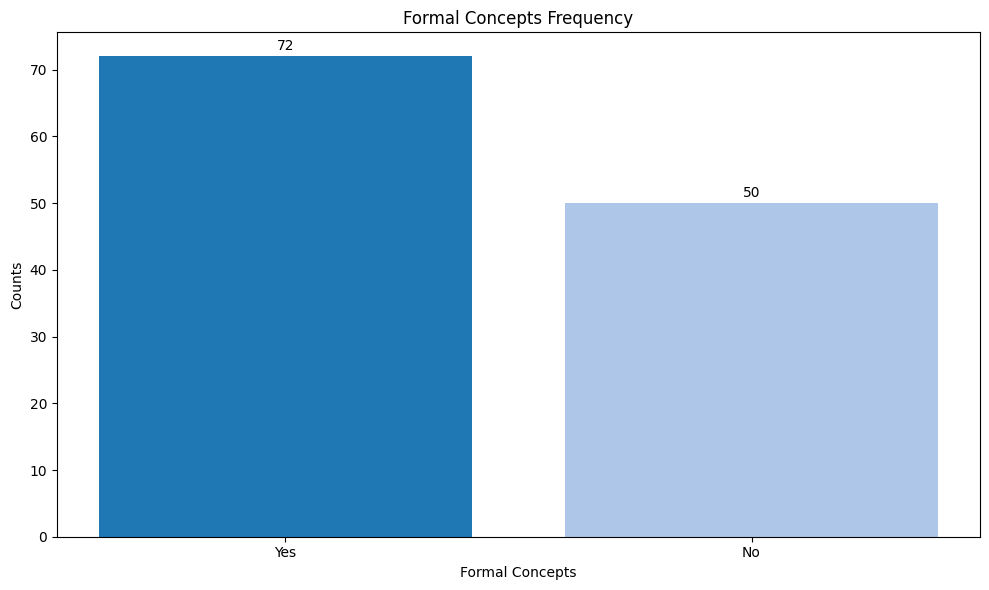

In [15]:
# Updated list of Formal Concepts categories
formal_concepts = ["Yes", "No"]

# Initialize Counter for Formal Concepts
concept_counts = Counter()

# Analyze 'Formal Concepts'
for entry in data['Formal concepts'].dropna():
    # Count each concept if it's in the defined formal_concepts
    if entry in formal_concepts:
        concept_counts[entry] += 1

# Ensure all formal_concepts are in the counter (including zero occurrences)
for concept in formal_concepts:
    concept_counts[concept] += 0  # Ensures categories with 0 counts appear in the output

# Sort concepts by count
sorted_concepts = sorted(concept_counts.items(), key=lambda x: x[1], reverse=True)
concept_labels = [x[0] for x in sorted_concepts]
concept_values = [x[1] for x in sorted_concepts]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(concept_labels)]

# Visualization: Bar chart for Formal Concepts
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(concept_labels)), concept_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, concept_labels, concept_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(concept_labels)), concept_labels, rotation=0, ha="center")

plt.xlabel("Formal Concepts")
plt.ylabel("Counts")
plt.title("Formal Concepts Frequency")
plt.tight_layout()
plt.show()

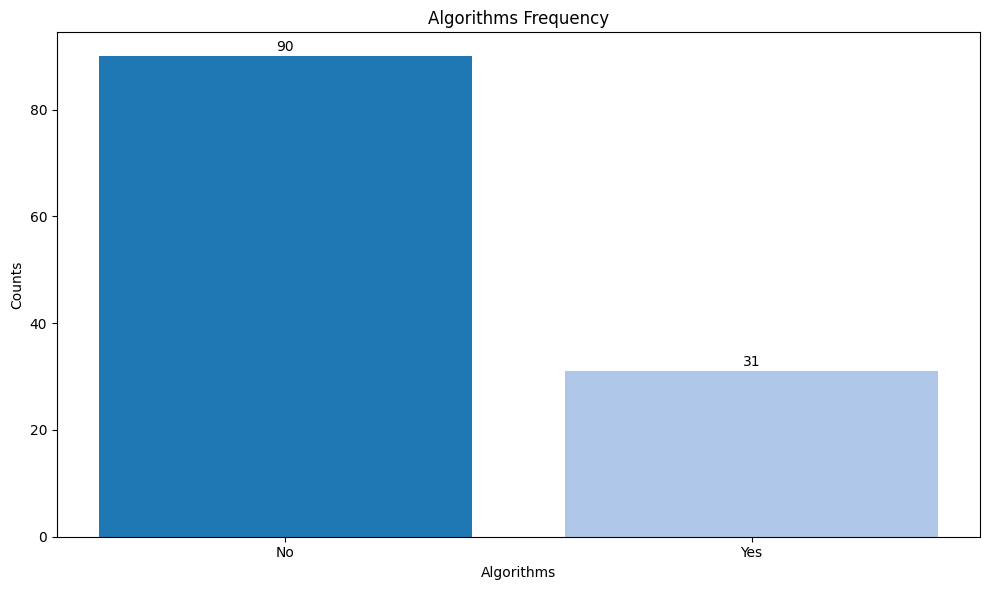

In [16]:
# Updated list of Algorithms categories
algorithm_categories = ["Yes", "No"]

# Initialize Counter for Algorithms
algorithm_counts = Counter()

# Analyze 'Algorithms'
for entry in data['Algorithms'].dropna():
    # Count each category if it's in the defined algorithm_categories
    if entry in algorithm_categories:
        algorithm_counts[entry] += 1

# Ensure all algorithm_categories are in the counter (including zero occurrences)
for category in algorithm_categories:
    algorithm_counts[category] += 0  # Ensures categories with 0 counts appear in the output

# Sort categories by count
sorted_algorithms = sorted(algorithm_counts.items(), key=lambda x: x[1], reverse=True)
algorithm_labels = [x[0] for x in sorted_algorithms]
algorithm_values = [x[1] for x in sorted_algorithms]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(algorithm_labels)]

# Visualization: Bar chart for Algorithms
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(algorithm_labels)), algorithm_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, algorithm_labels, algorithm_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(algorithm_labels)), algorithm_labels, rotation=0, ha="center")

plt.xlabel("Algorithms")
plt.ylabel("Counts")
plt.title("Algorithms Frequency")
plt.tight_layout()
plt.show()

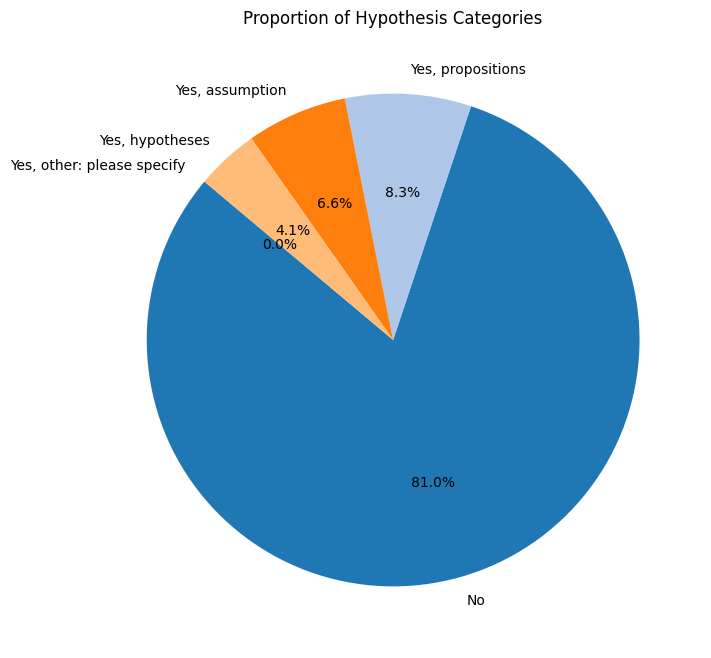

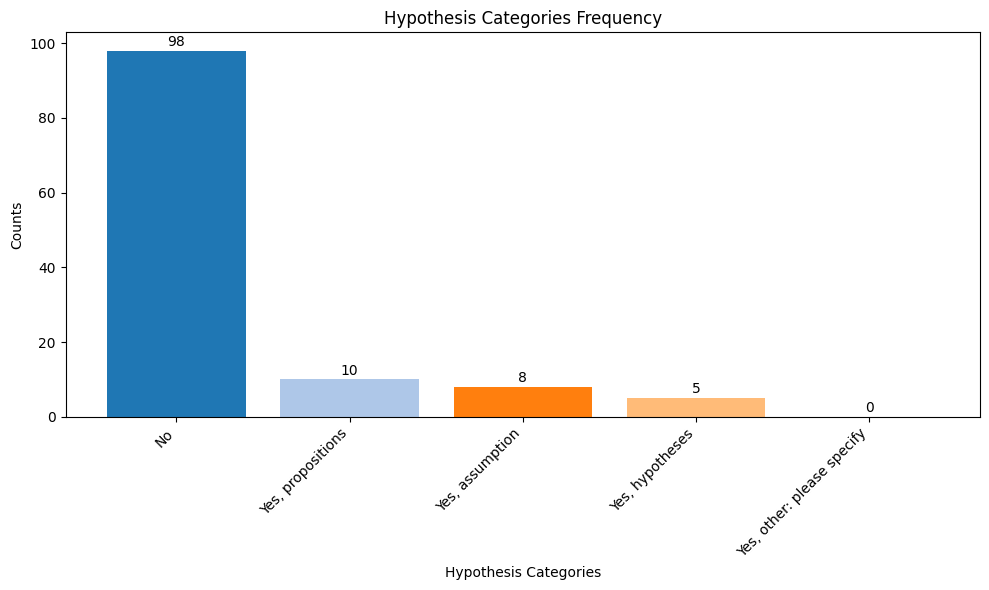

In [17]:
# Updated list of Hypothesis categories
hypothesis_categories = [
    "Yes, propositions", "Yes, hypotheses", "Yes, assumption",
    "Yes, other: please specify", "No"
]

# Initialize Counter for Hypothesis
hypothesis_counts = Counter()

# Analyze 'Hypothesis'
for entry in data['Hypothesis'].dropna():
    # Count each category if it's in the defined hypothesis_categories
    if entry in hypothesis_categories:
        hypothesis_counts[entry] += 1

# Ensure all hypothesis_categories are in the counter (including zero occurrences)
for category in hypothesis_categories:
    hypothesis_counts[category] += 0  # Ensures categories with 0 counts appear in the output

# Sort categories by count
sorted_hypothesis = sorted(hypothesis_counts.items(), key=lambda x: x[1], reverse=True)
hypothesis_labels = [x[0] for x in sorted_hypothesis]
hypothesis_values = [x[1] for x in sorted_hypothesis]

# Use a consistent color scheme
colors = plt.cm.tab20.colors[:len(hypothesis_labels)]

# Visualization: Pie chart for Hypothesis
plt.figure(figsize=(8, 8))
plt.pie(hypothesis_values, labels=hypothesis_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Hypothesis Categories")
plt.show()

# Visualization: Bar chart for Hypothesis
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(hypothesis_labels)), hypothesis_values, color=colors)

# Add frequency labels above the bars
for bar, label, value in zip(bars, hypothesis_labels, hypothesis_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(value)}",  # Display the frequency
        ha="center", va="bottom", fontsize=10
    )

# Fix x-axis labels to align with bars
plt.xticks(range(len(hypothesis_labels)), hypothesis_labels, rotation=45, ha="right")

plt.xlabel("Hypothesis Categories")
plt.ylabel("Counts")
plt.title("Hypothesis Categories Frequency")
plt.tight_layout()
plt.show()

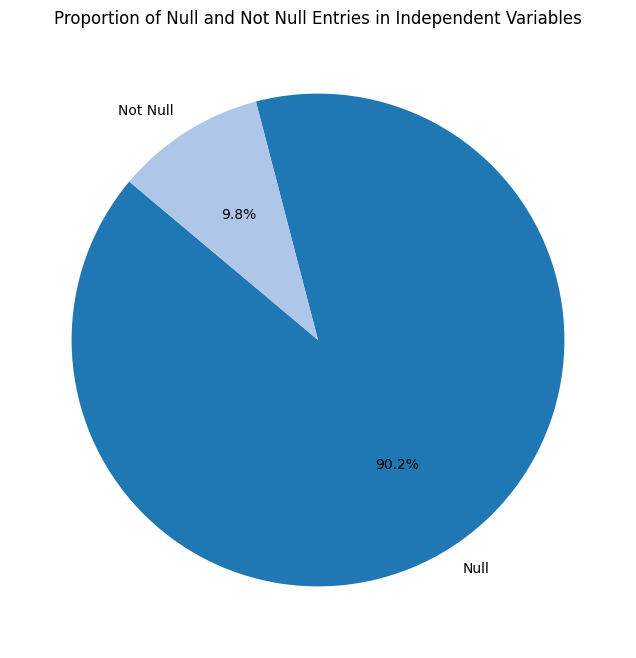

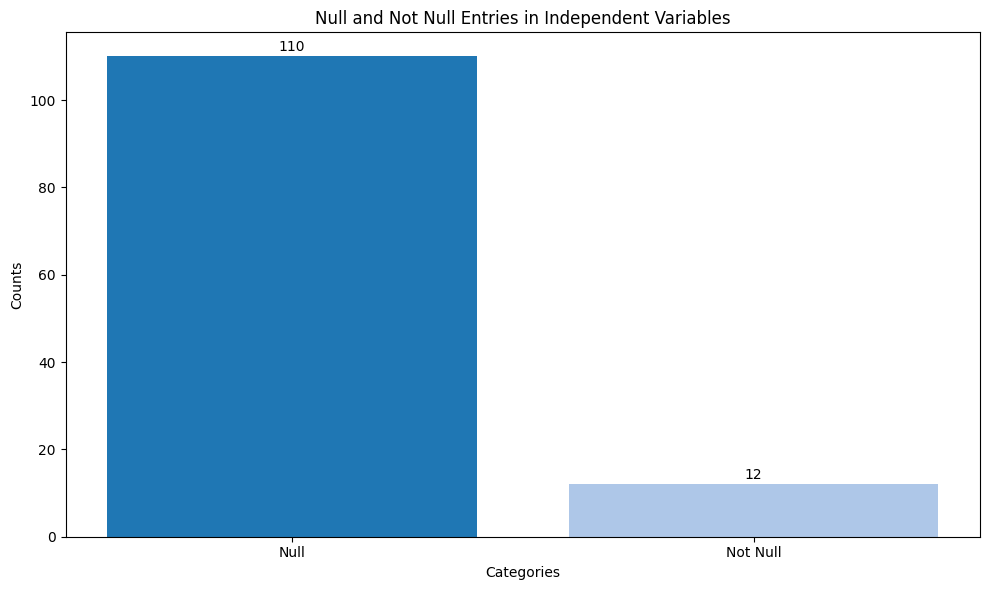

In [18]:
# Count null and non-null entries in 'Independent Variables'
null_count = data['Independent Variables'].isnull().sum()
non_null_count = data['Independent Variables'].notnull().sum()

# Prepare data for visualization
categories = ['Null', 'Not Null']
counts = [null_count, non_null_count]
colors = plt.cm.tab20.colors[:len(categories)]

# Visualization: Pie chart for Null/Not Null counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Null and Not Null Entries in Independent Variables")
plt.show()

# Visualization: Bar chart for Null/Not Null counts
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add frequency labels above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(count)}",  # Display the count
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Null and Not Null Entries in Independent Variables")
plt.tight_layout()
plt.show()

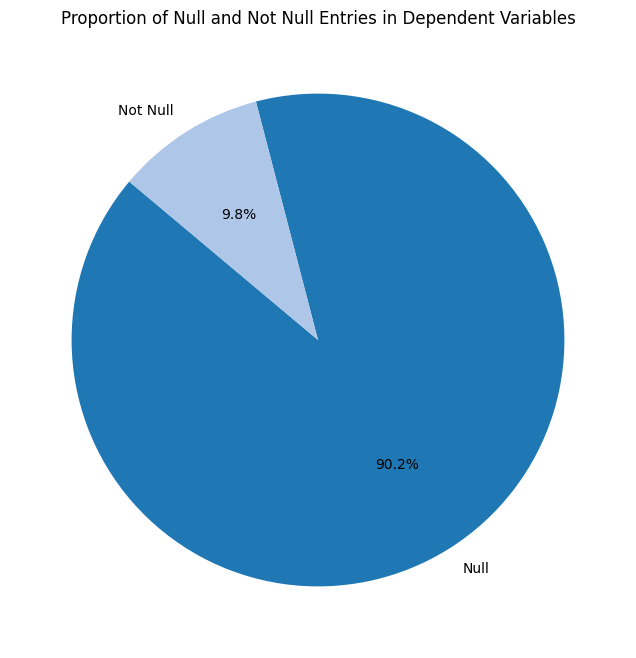

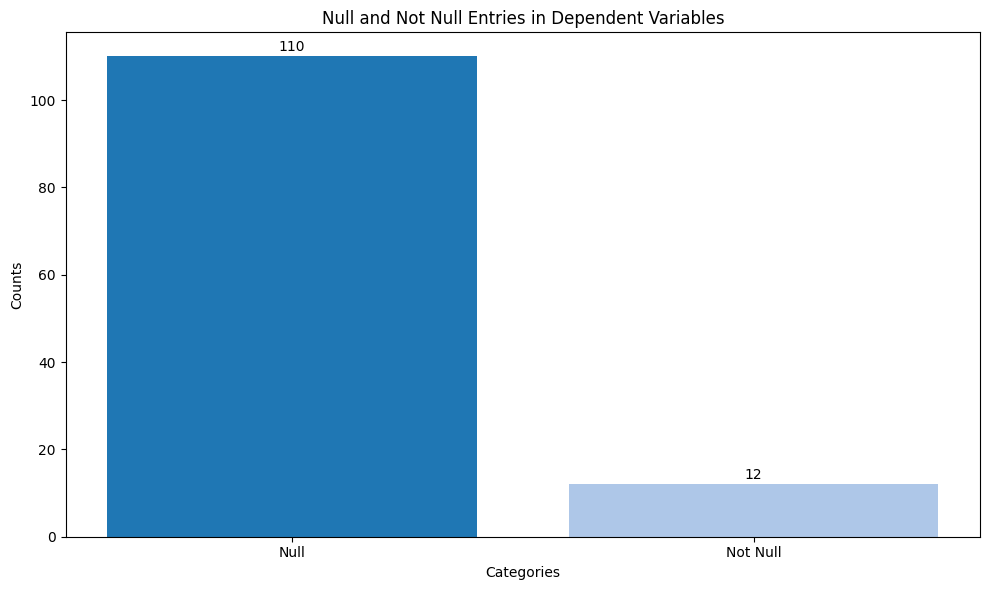

In [19]:
# Count null and non-null entries in 'Dependent Variables'
null_count = data['Dependent Variables'].isnull().sum()
non_null_count = data['Dependent Variables'].notnull().sum()

# Prepare data for visualization
categories = ['Null', 'Not Null']
counts = [null_count, non_null_count]
colors = plt.cm.tab20.colors[:len(categories)]

# Visualization: Pie chart for Null/Not Null counts
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Null and Not Null Entries in Dependent Variables")
plt.show()

# Visualization: Bar chart for Null/Not Null counts
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add frequency labels above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(count)}",  # Display the count
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Null and Not Null Entries in Dependent Variables")
plt.tight_layout()
plt.show()

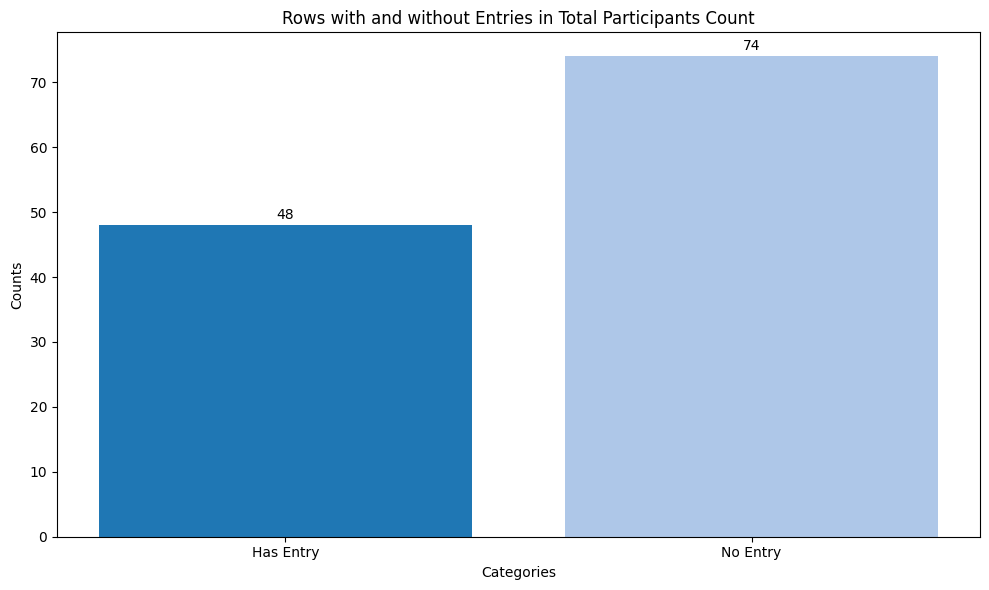

In [20]:
# Count rows with entries in either 'Total participants count' or 'Total participants count.1'
has_entry = data[['Total participants count', 'Total participants count.1']].notnull().any(axis=1).sum()
no_entry = data[['Total participants count', 'Total participants count.1']].notnull().any(axis=1).size - has_entry

# Prepare data for visualization
categories = ['Has Entry', 'No Entry']
counts = [has_entry, no_entry]
colors = plt.cm.tab20.colors[:len(categories)]

# Visualization: Bar chart for Has Entry and No Entry counts
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add frequency labels above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(count)}",  # Display the count
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Rows with and without Entries in Total Participants Count")
plt.tight_layout()
plt.show()

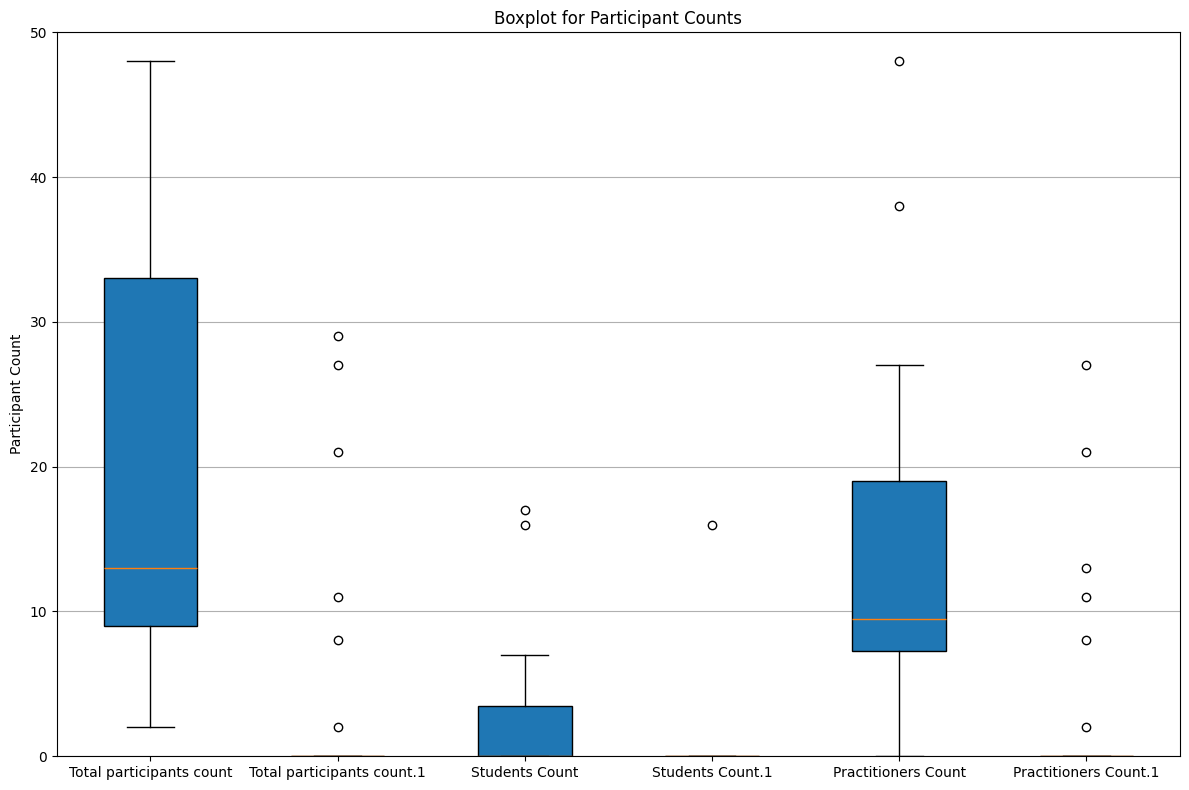

In [21]:
# Function to clean numeric values by removing inequality symbols
def clean_numeric(entry):
    if isinstance(entry, str):
        # Remove symbols like >=, <=, >, <
        entry = entry.lstrip('<>=').strip()
    try:
        return float(entry)  # Convert to float if possible
    except ValueError:
        return None  # Return None if conversion fails

# Clean the columns
columns_to_clean = [
    'Total participants count', 'Total participants count.1',
    'Students Count', 'Students Count.1',
    'Practitioners Count', 'Practitioners Count.1'
]

for col in columns_to_clean:
    data[col] = data[col].apply(clean_numeric)

# Combine all columns for the boxplot
boxplot_data = [
    data['Total participants count'].dropna(),
    data['Total participants count.1'].dropna(),
    data['Students Count'].dropna(),
    data['Students Count.1'].dropna(),
    data['Practitioners Count'].dropna(),
    data['Practitioners Count.1'].dropna()
]

# Labels for the boxplot
labels = [
    'Total participants count', 'Total participants count.1',
    'Students Count', 'Students Count.1',
    'Practitioners Count', 'Practitioners Count.1'
]

# Create the boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, tick_labels=labels, patch_artist=True, showfliers=True)  # Include outliers

# Customize the boxplot
plt.title('Boxplot for Participant Counts')
plt.ylabel('Participant Count')
plt.ylim(0, 50)  # Adjust the y-axis limit to focus on main distribution
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

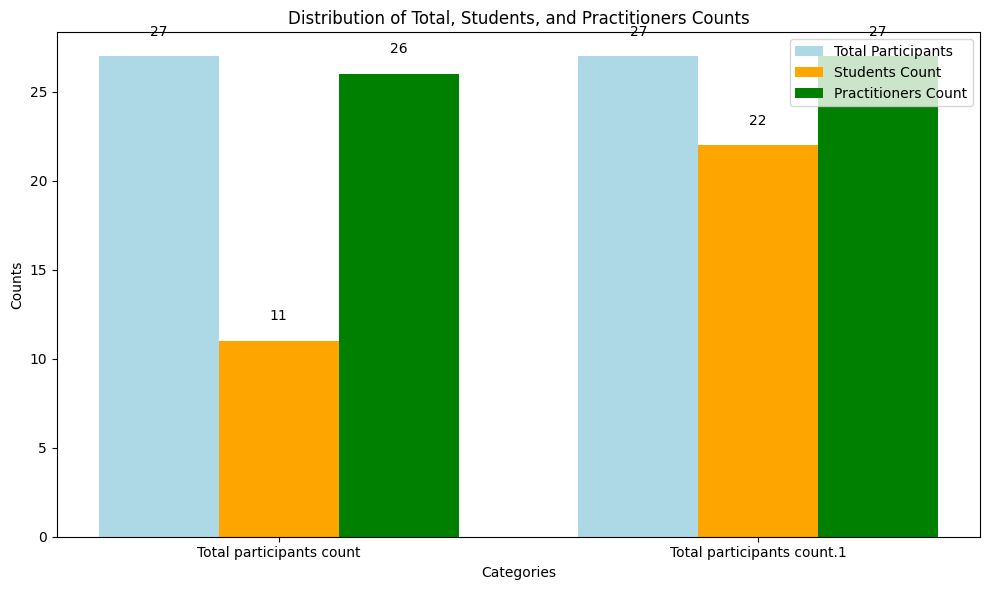

In [22]:
# Function to clean numeric values by removing inequality symbols
def clean_numeric(entry):
    if isinstance(entry, str):
        # Remove symbols like >=, <=, >, <
        entry = entry.lstrip('<>=').strip()
    try:
        return float(entry)  # Convert to float if possible
    except ValueError:
        return None  # Return None if conversion fails

# Clean the relevant columns
columns_to_clean = [
    'Total participants count', 'Total participants count.1',
    'Students Count', 'Students Count.1',
    'Practitioners Count', 'Practitioners Count.1'
]

for col in columns_to_clean:
    data[col] = data[col].apply(clean_numeric)

# Count occurrences
categories = ['Total participants count', 'Total participants count.1']
students_counts = [
    data['Students Count'][data['Total participants count'].notnull()].notnull().sum(),
    data['Students Count.1'][data['Total participants count.1'].notnull()].notnull().sum()
]
practitioners_counts = [
    data['Practitioners Count'][data['Total participants count'].notnull()].notnull().sum(),
    data['Practitioners Count.1'][data['Total participants count.1'].notnull()].notnull().sum()
]
total_counts = [
    data['Total participants count'].notnull().sum(),
    data['Total participants count.1'].notnull().sum()
]

# Visualization: Grouped bar chart
x = range(len(categories))
bar_width = 0.25

plt.figure(figsize=(10, 6))

# Plot each group
plt.bar(x, total_counts, width=bar_width, label='Total Participants', color='lightblue')
plt.bar([p + bar_width for p in x], students_counts, width=bar_width, label='Students Count', color='orange')
plt.bar([p + 2 * bar_width for p in x], practitioners_counts, width=bar_width, label='Practitioners Count', color='green')

# Add value labels
for i, count in enumerate(total_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
for i, count in enumerate(students_counts):
    plt.text(i + bar_width, count + 1, str(count), ha='center', va='bottom', fontsize=10)
for i, count in enumerate(practitioners_counts):
    plt.text(i + 2 * bar_width, count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Adjust x-axis
plt.xticks([p + bar_width for p in x], categories)

# Labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Total, Students, and Practitioners Counts')
plt.legend()
plt.tight_layout()
plt.show()

Students Proportions: [0.3695652173913043, 0.0, 0.5517241379310345, 0.5517241379310345, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5384615384615384, 0.0, 0.0]
Practitioners Proportions: [1.0, 0.15217391304347827, 1.0, 1.0, 0.4482758620689655, 0.4482758620689655, 1.0, 1.0, 1.0, 1.0, 0.5405405405405406, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.15384615384615385, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


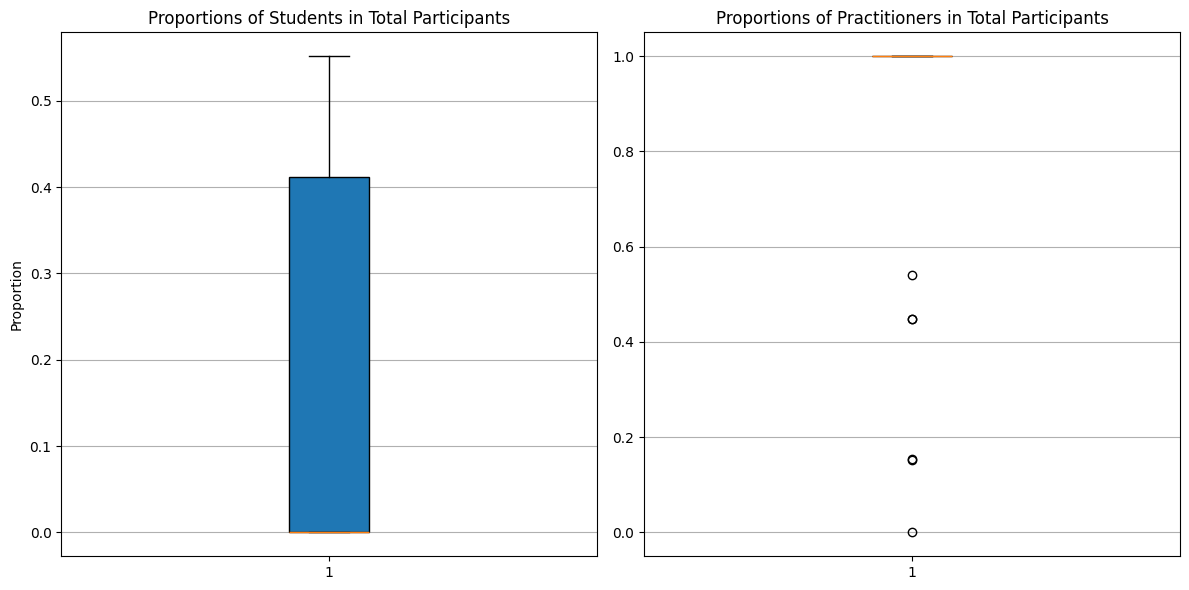

In [23]:
# Function to clean numeric values by removing inequality symbols
def clean_numeric(entry):
    if isinstance(entry, str):
        # Remove symbols like >=, <=, >, <
        entry = entry.lstrip('<>=').strip()
    try:
        return float(entry)  # Convert to float if possible
    except ValueError:
        return None  # Return None if conversion fails

# Clean the relevant columns
columns_to_clean = [
    'Total participants count', 'Total participants count.1',
    'Students Count', 'Students Count.1',
    'Practitioners Count', 'Practitioners Count.1'
]

for col in columns_to_clean:
    data[col] = data[col].apply(clean_numeric)

# Function to calculate individual proportions
def calculate_individual_proportion(row, total_col, count_col):
    total = row[total_col]
    count = row[count_col]

    # Ensure valid entries for calculation
    if total is not None and total > 0 and count is not None:
        return count / total
    return None

# Calculate proportions for Students and Practitioners
students_proportions = []
practitioners_proportions = []

for _, row in data.iterrows():
    # Students proportions
    sp1 = calculate_individual_proportion(row, 'Total participants count', 'Students Count')
    sp2 = calculate_individual_proportion(row, 'Total participants count.1', 'Students Count.1')

    if sp1 is not None:
        students_proportions.append(sp1)
    if sp2 is not None:
        students_proportions.append(sp2)

    # Practitioners proportions
    pp1 = calculate_individual_proportion(row, 'Total participants count', 'Practitioners Count')
    pp2 = calculate_individual_proportion(row, 'Total participants count.1', 'Practitioners Count.1')

    if pp1 is not None:
        practitioners_proportions.append(pp1)
    if pp2 is not None:
        practitioners_proportions.append(pp2)

# Remove NaN values (if any)
students_proportions = [p for p in students_proportions if not np.isnan(p)]
practitioners_proportions = [p for p in practitioners_proportions if not np.isnan(p)]

# Debugging: Print out the calculated proportions
print("Students Proportions:", students_proportions)
print("Practitioners Proportions:", practitioners_proportions)

# Create separate boxplots
plt.figure(figsize=(12, 6))

# Boxplot for Students
plt.subplot(1, 2, 1)
plt.boxplot(students_proportions, patch_artist=True)
plt.title("Proportions of Students in Total Participants")
plt.ylabel("Proportion")
plt.grid(axis='y')

# Boxplot for Practitioners
plt.subplot(1, 2, 2)
plt.boxplot(practitioners_proportions, patch_artist=True)
plt.title("Proportions of Practitioners in Total Participants")
plt.grid(axis='y')

# Display the plots
plt.tight_layout()
plt.show()

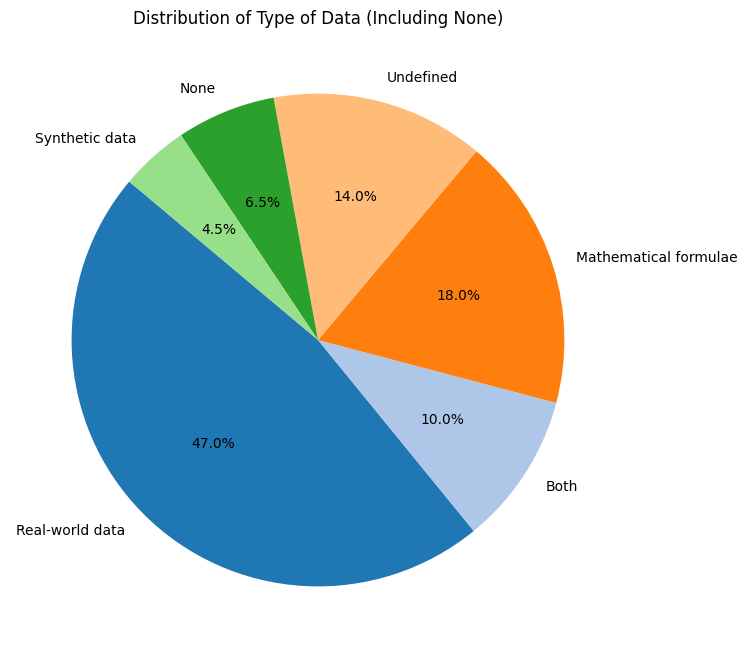

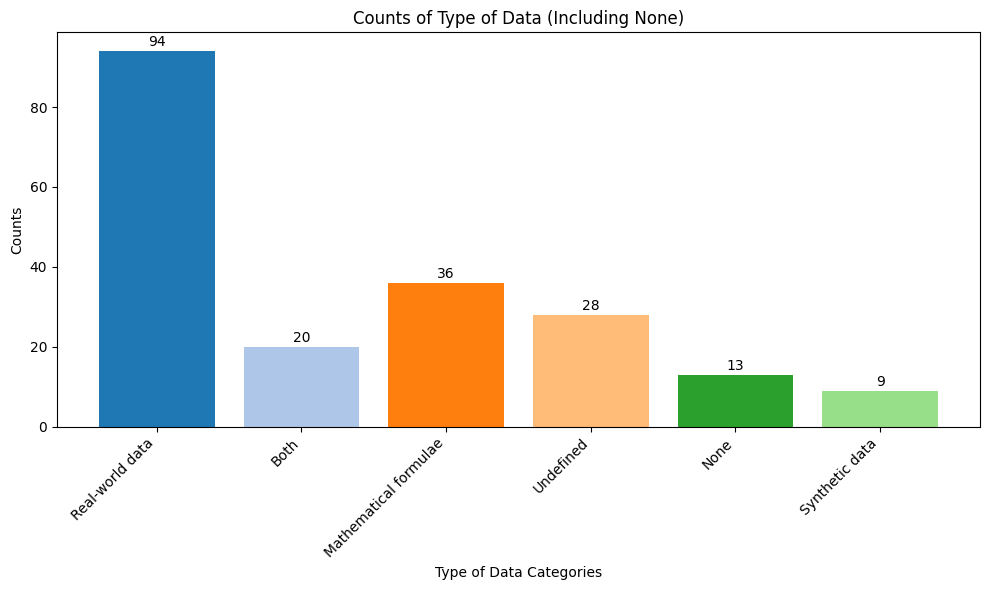

In [24]:
# List of categories
data_categories = [
    "Real-world data",
    "Synthetic data",
    "Both",
    "Mathematical formulae",
    "Undefined",
    "None"  # Include None as a category
]

# Initialize Counter
data_counts = Counter()

# Count occurrences in 'Type of data' and 'Type of data.1'
for idx, row in data.iterrows():
    # For 'Type of data'
    if pd.isna(row['Type of data']) and pd.notna(row['Type of Artefact 1']):
        data_counts["None"] += 1
    elif row['Type of data'] in data_categories:
        data_counts[row['Type of data']] += 1

    # For 'Type of data.1'
    if pd.isna(row['Type of data.1']) and pd.notna(row['Type of Artefact 2']):
        data_counts["None"] += 1
    elif row['Type of data.1'] in data_categories:
        data_counts[row['Type of data.1']] += 1

# Prepare data for visualization
categories = list(data_counts.keys())
counts = list(data_counts.values())

# Use consistent colors
colors = plt.cm.tab20.colors[:len(categories)]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Type of Data (Including None)")
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add value labels above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(count)}",  # Display the count
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Type of Data Categories")
plt.ylabel("Counts")
plt.title("Counts of Type of Data (Including None)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

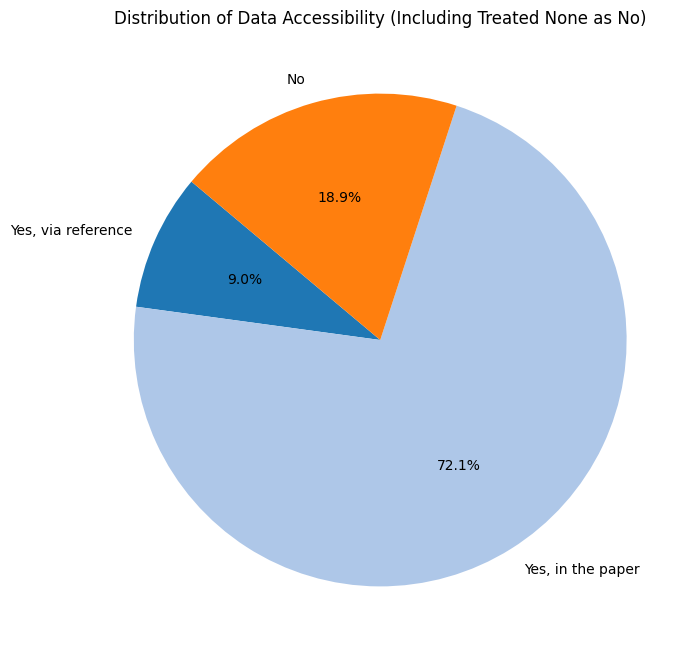

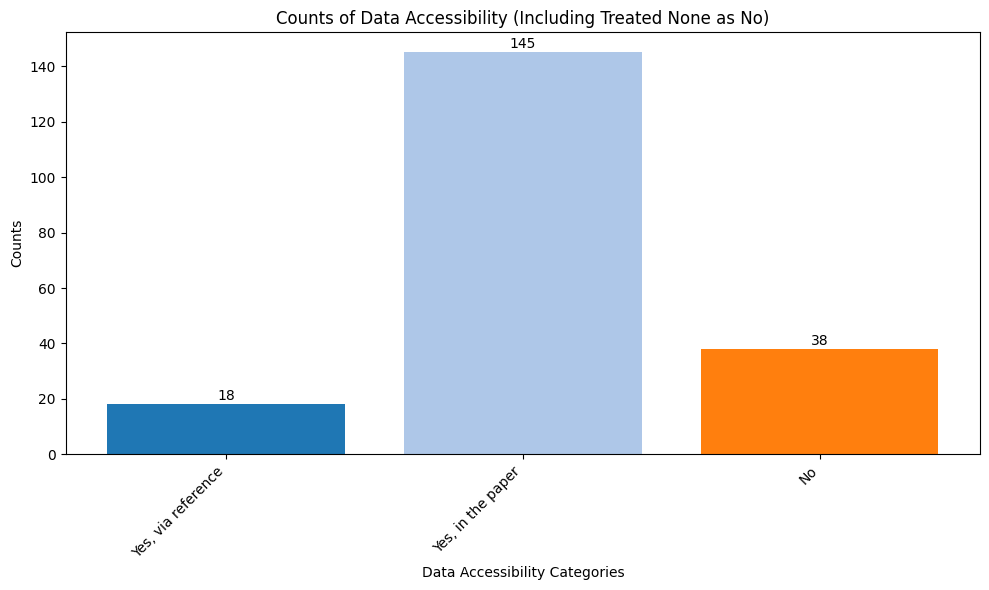

In [25]:
# List of categories
accessibility_categories = [
    "Yes, in the paper",
    "Yes, via reference",
    "No"
]

# Initialize Counter
accessibility_counts = Counter()

# Count occurrences in 'Data accessibility' and 'Data accessibility.1'
for idx, row in data.iterrows():
    # For 'Data accessibility'
    if pd.isna(row['Data accessibility']) and pd.notna(row['Type of Artefact 1']):
        accessibility_counts["No"] += 1  # Treat None as No
    elif row['Data accessibility'] in accessibility_categories:
        accessibility_counts[row['Data accessibility']] += 1

    # For 'Data accessibility.1'
    if pd.isna(row['Data accessibility.1']) and pd.notna(row['Type of Artefact 2']):
        accessibility_counts["No"] += 1  # Treat None as No
    elif row['Data accessibility.1'] in accessibility_categories:
        accessibility_counts[row['Data accessibility.1']] += 1

# Prepare data for visualization
categories = list(accessibility_counts.keys())
counts = list(accessibility_counts.values())

# Use consistent colors
colors = plt.cm.tab20.colors[:len(categories)]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Data Accessibility (Including Treated None as No)")
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add value labels above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(count)}",  # Display the count
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Data Accessibility Categories")
plt.ylabel("Counts")
plt.title("Counts of Data Accessibility (Including Treated None as No)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

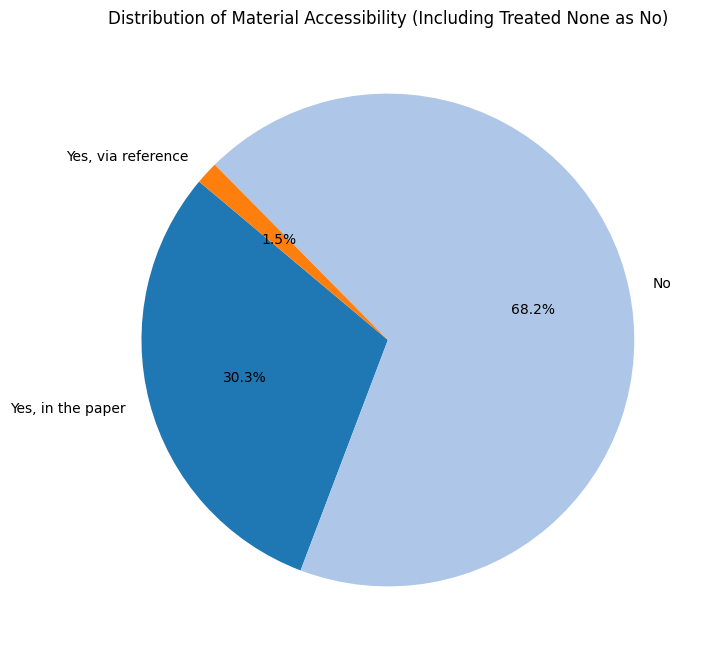

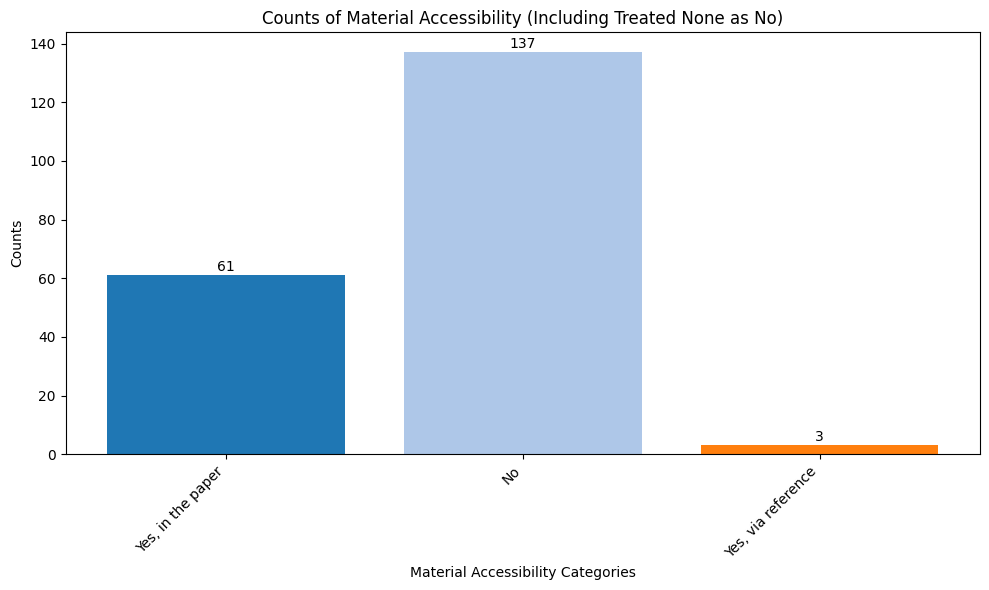

In [26]:
# List of categories
accessibility_categories = [
    "Yes, in the paper",
    "Yes, via reference",
    "No"
]

# Initialize Counter
accessibility_counts = Counter()

# Count occurrences in 'Data accessibility' and 'Data accessibility.1'
for idx, row in data.iterrows():
    # For 'Data accessibility'
    if pd.isna(row['Material accessibility']) and pd.notna(row['Type of Artefact 1']):
        accessibility_counts["No"] += 1  # Treat None as No
    elif row['Material accessibility'] in accessibility_categories:
        accessibility_counts[row['Material accessibility']] += 1

    # For 'Data accessibility.1'
    if pd.isna(row['Material accessibility.1']) and pd.notna(row['Type of Artefact 2']):
        accessibility_counts["No"] += 1  # Treat None as No
    elif row['Material accessibility.1'] in accessibility_categories:
        accessibility_counts[row['Material accessibility.1']] += 1

# Prepare data for visualization
categories = list(accessibility_counts.keys())
counts = list(accessibility_counts.values())

# Use consistent colors
colors = plt.cm.tab20.colors[:len(categories)]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Material Accessibility (Including Treated None as No)")
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add value labels above the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above the bar
        f"{int(count)}",  # Display the count
        ha="center", va="bottom", fontsize=10
    )

plt.xlabel("Material Accessibility Categories")
plt.ylabel("Counts")
plt.title("Counts of Material Accessibility (Including Treated None as No)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()